* Course No : CSE 4214 <br>
* Course Name: Pattern Recognition Lab <br>
* Group: A2 <br>

* Assignment No: 04 <br>
* Assignment Name: Implementing K-Means Clustering

# Packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
%cd drive/MyDrive/Colab Notebooks/CSE 4214 Pattern Recognition Lab/Lab 6/

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/CSE 4214 Pattern Recognition Lab/Lab 6/'
/content/drive/MyDrive/Colab Notebooks/CSE 4214 Pattern Recognition Lab/Lab 6


# Task 1: Take input from the given source data file and plot all the points

In [45]:
path  = 'data_k_mean.txt'
train = pd.read_csv(path, sep=' ' , header = None)
train1 = train.to_numpy()
print(train1)

[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-6.67986 -5.8308 ]
 ...
 [ 6.91832 -0.32132]
 [-8.23828 -4.00405]
 [-5.75112 -5.99531]]


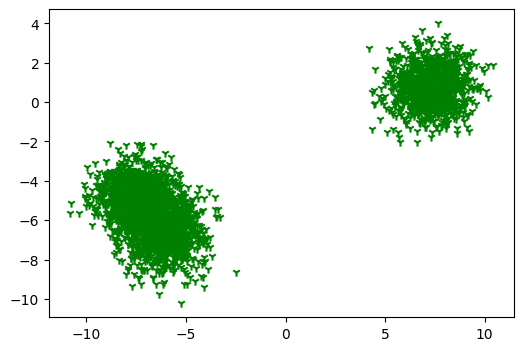

In [46]:
import matplotlib.pyplot as plt

x_values = train[0]
y_values = train[1]

plt.figure(figsize=(6, 4))
plt.scatter(x_values, y_values, color='green', marker='1')
plt.show()


# Task 2: Perform the k-means clustering algorithm applying Euclidean distance as a distance measure on the given dataset with k=2.

In [47]:
#taking k as input
k = int(input("Enter the value of k : "))

Enter the value of k : 2


In [48]:
#random centroids for 1st iteration
np.random.seed(seed=37)
random_numbers = np.random.randint(low=0, high=len(train1), size=(k))
centroids = [train1[random_numbers[i]] for i in range(k)]
print(centroids)

[array([-7.13492, -6.20165]), array([6.88194, 0.94249])]


In [49]:
import numpy as np

distance = []  # To store the distance from each point to clusters
index_clusters = np.full(len(train1), -1)  # To store the class index corresponding to each data point
clusters = {y: [] for y in range(k)}  # To store class numbers as keys and data points as values

for count in range(500):
    flag = 0  # Flag to keep track of changes

    for y in range(k):
        clusters[y] = []

    for i in range(len(train1)):
        distances = [np.sqrt(np.sum((train1[i] - centroids[j])**2)) for j in range(k)]
        index = np.argmin(distances)

        if index_clusters[i] != index:
            flag = 1
            index_clusters[i] = index
        clusters[index].append(train1[i])

    if flag == 0:
        break

    centroids = [np.mean(np.asarray(clusters[z]), axis=0) for z in range(k)]

x1, y1 = np.asarray(clusters[0]).T
x2, y2 = np.asarray(clusters[1]).T

# Task 3: Color the corresponding points on the clusters with different colors.

<ipython-input-50-9a11847c17dc>:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x1, y1, c='orange', marker='1', label='Class 1', edgecolors='black')


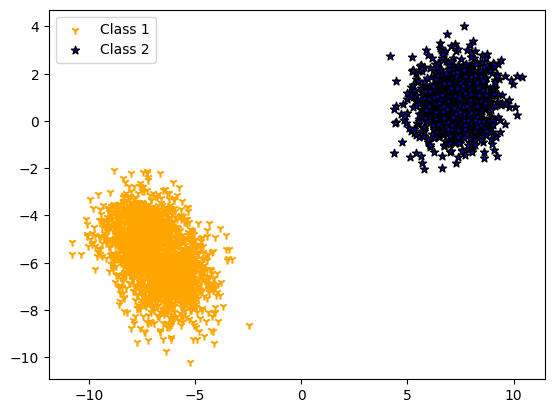

In [50]:
import matplotlib.pyplot as plt

# Extracting coordinates
x1, y1 = np.asarray(clusters[0]).T
x2, y2 = np.asarray(clusters[1]).T

# Plotting classified data points of two classes with different markers and symbols
plt.scatter(x1, y1, c='orange', marker='1', label='Class 1', edgecolors='black')
plt.scatter(x2, y2, c='blue', marker='*', label='Class 2', edgecolors='black')

plt.legend(loc='best')
plt.show()
